In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tabulate import tabulate 
import glob

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
NABIS = pd.read_csv("./진짜 진짜 진짜로 전처리 완료된 대회 분석 데이터.csv")
NABIS = pd.DataFrame(NABIS)
NABIS

,Unnamed: 0,연도,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,강원특별자치도_소아과 의료인력 수,강원특별자치도_천명당 소아과 수,...,전북특별자치도_소아과 병원 수_표준화,전북특별자치도_소아과 의료인력 수_표준화,전라남도_소아과 병원 수_표준화,전라남도_소아과 의료인력 수_표준화,경상북도_소아과 병원 수_표준화,경상북도_소아과 의료인력 수_표준화,경상남도_소아과 병원 수_표준화,경상남도_소아과 의료인력 수_표준화,제주특별자치도_소아과 병원 수_표준화,제주특별자치도_소아과 의료인력 수_표준화
0,0,2019,258854,74.9,864,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
1,1,2019,258854,83.4,864,21588423.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
2,2,2019,258854,74.9,10940,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
3,3,2019,258854,83.4,10940,21588423.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
4,4,2019,258854,74.9,8032,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1787,2022,617545,78.4,8032,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1788,1788,2022,617545,78.4,996,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1789,1789,2022,617545,90.2,996,55702559.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1790,1790,2022,617545,78.4,816,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767


In [3]:
from sklearn.cluster import KMeans

features = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', '지역 소아과 수', 
    '서울특별시_소아과 병원 수_표준화', '서울특별시_소아과 의료인력 수_표준화']]

# n_clusters: 군집 개수를 설정 
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

NABIS['K-MEAN 군집'] = kmeans.fit_predict(features)

KGoonjib = './K-MEAN 서울 군집화 결과2.xlsx'
NABIS.to_excel(KGoonjib, index=False)

NABIS['K-MEAN 군집'].value_counts()

K-MEAN 군집
1    672
5    224
9    112
2    112
8    112
4    112
3    112
6    112
7    112
0    112
Name: count, dtype: int64

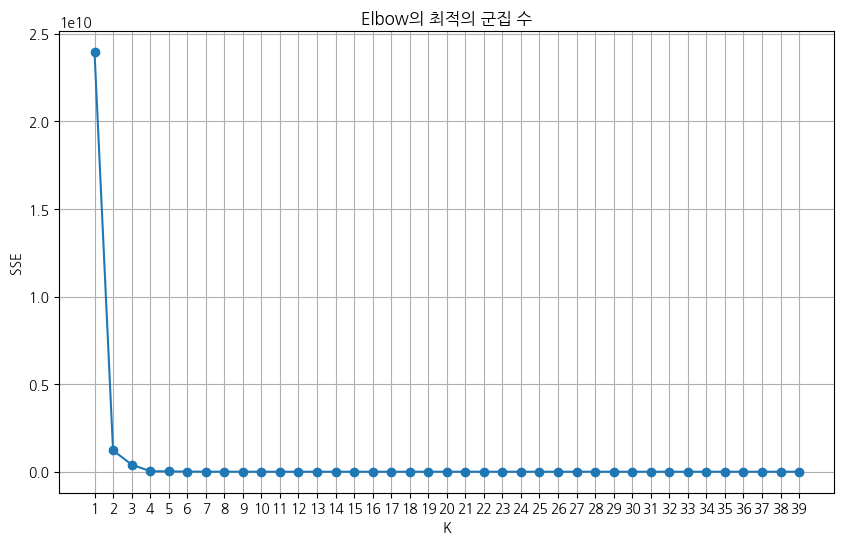

In [4]:
# Elbow 방법으로 SSE(군집내 제곱합)을 계산하여 최적의 군집 수 찾기
sse = []  
k_range = range(1, 40)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()

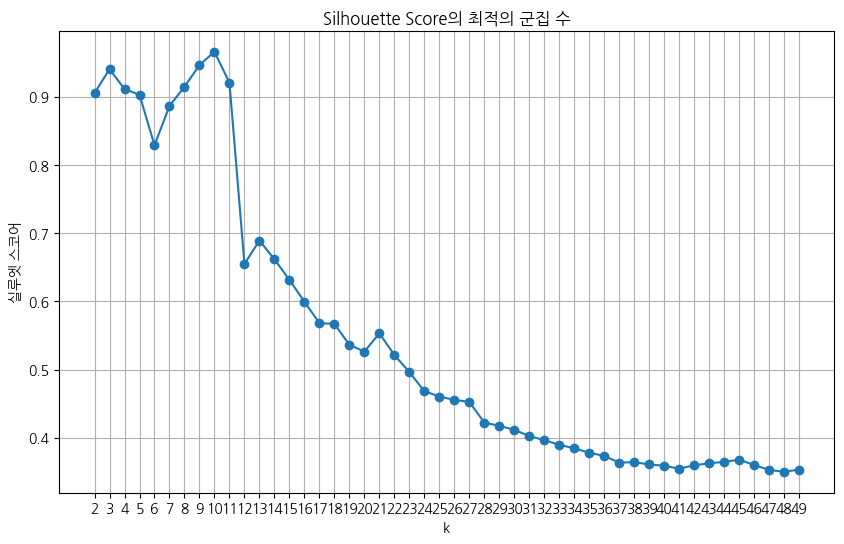

In [5]:
from sklearn.metrics import silhouette_score

# 실루엣 계수로 최적의 군집 수 찾기
silhouette_scores = []
k_range = range(2, 50)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('실루엣 스코어')
plt.title('Silhouette Score의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()


군집별 데이터 수:
 K-MEAN 군집
1    672
5    224
9    112
2    112
8    112
4    112
3    112
6    112
7    112
0    112
Name: count, dtype: int64

군집별 평균값:
            Unnamed: 0      연도          의료수가      가중치  지역 소아과 수          최종수가  \
K-MEAN 군집                                                                      
0          910.500000  2020.5  1.467406e+06  81.7250     816.0  1.199092e+08   
1          896.833333  2020.5  1.467406e+06  77.5375    8032.0  1.137681e+08   
2          882.500000  2020.5  1.467406e+06  81.7250   10940.0  1.199092e+08   
3          894.500000  2020.5  1.467406e+06  81.7250    2172.0  1.199092e+08   
4          890.500000  2020.5  1.467406e+06  81.7250    1816.0  1.199092e+08   
5          900.500000  2020.5  1.467406e+06  81.7250    1000.0  1.199092e+08   
6          898.500000  2020.5  1.467406e+06  81.7250     580.0  1.199092e+08   
7          900.500000  2020.5  1.467406e+06  81.7250    2388.0  1.199092e+08   
8          888.500000  2020.5  1.467406e+06  81.72

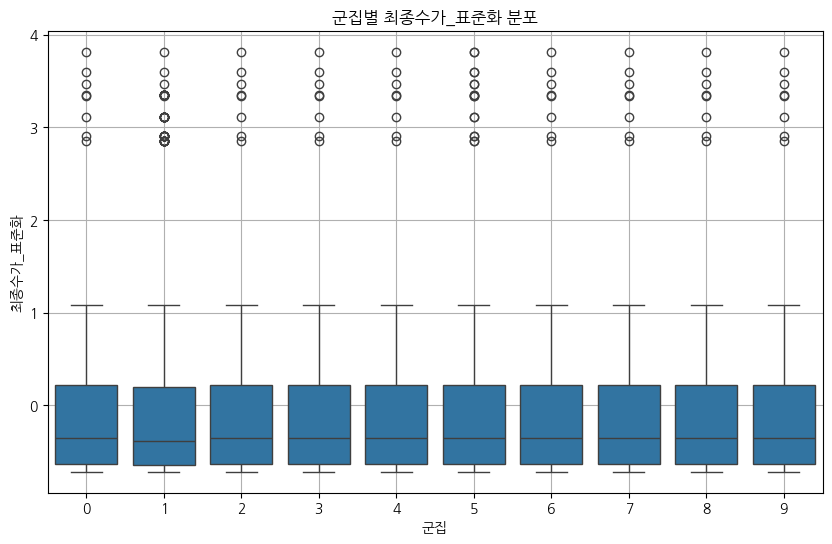

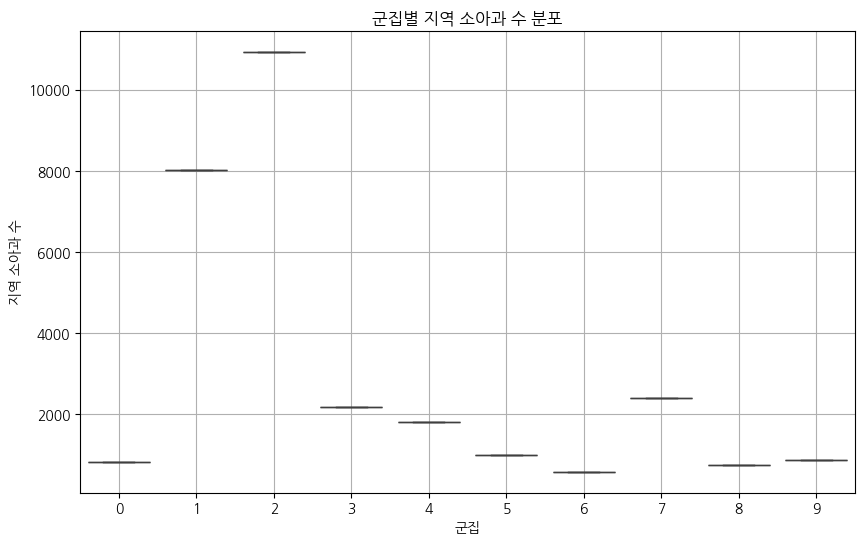

In [6]:
# k-mean 군집화 분석 

Kcluster_counts = NABIS['K-MEAN 군집'].value_counts()
print("\n군집별 데이터 수:\n", Kcluster_counts)

Kcluster_means = NABIS.groupby('K-MEAN 군집').mean()
print("\n군집별 평균값:\n", Kcluster_means)

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='최종수가_표준화', data=NABIS)
plt.title('군집별 최종수가_표준화 분포')
plt.xlabel('군집')
plt.ylabel('최종수가_표준화')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='지역 소아과 수', data=NABIS)
plt.title('군집별 지역 소아과 수 분포')
plt.xlabel('군집')
plt.ylabel('지역 소아과 수')
plt.grid(True)
plt.show()

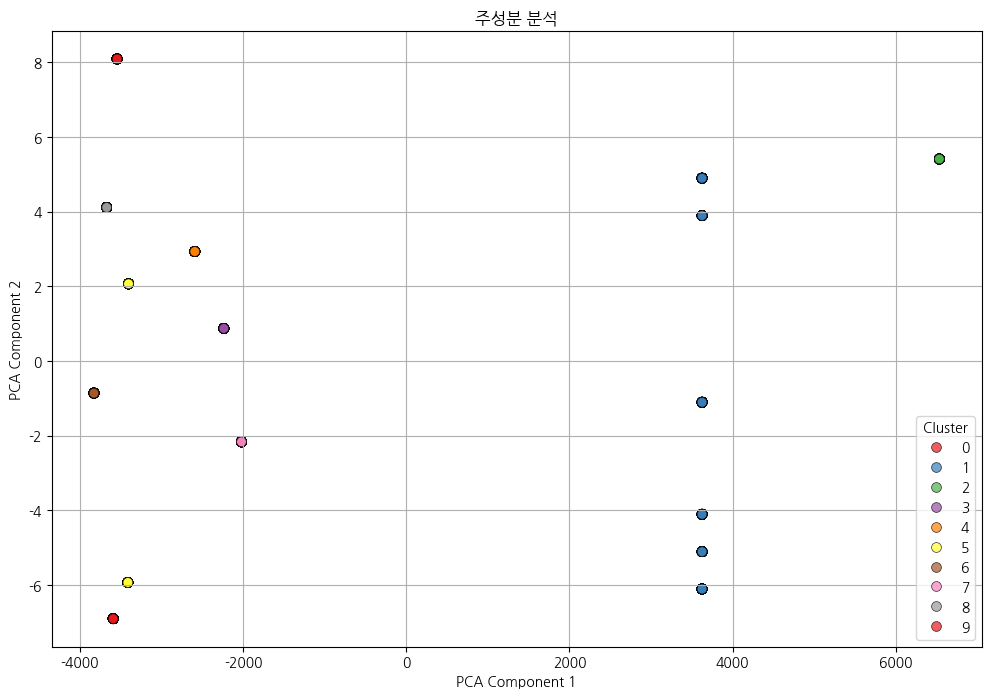

In [7]:
# PCA
from sklearn.decomposition import PCA
NABIS1 = NABIS.copy()

# 2차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

NABIS1['PCA1'] = pca_result[:, 0]
NABIS1['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='K-MEAN 군집', palette='Set1', data=NABIS1, s=50, alpha=0.7, edgecolor='k')
plt.title('주성분 분석')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [8]:
NABIS.columns

Index(['Unnamed: 0', '연도', '의료수가', '가중치', '지역 소아과 수', '최종수가', '강원특별자치도_건강보험',
       '강원특별자치도_소아과 병원 수', '강원특별자치도_소아과 의료인력 수', '강원특별자치도_천명당 소아과 수',
       ...
       '전북특별자치도_소아과 의료인력 수_표준화', '전라남도_소아과 병원 수_표준화', '전라남도_소아과 의료인력 수_표준화',
       '경상북도_소아과 병원 수_표준화', '경상북도_소아과 의료인력 수_표준화', '경상남도_소아과 병원 수_표준화',
       '경상남도_소아과 의료인력 수_표준화', '제주특별자치도_소아과 병원 수_표준화', '제주특별자치도_소아과 의료인력 수_표준화',
       'K-MEAN 군집'],
      dtype='object', length=122)

[0]	validation_0-rmse:0.99576	validation_1-rmse:0.96693
[1]	validation_0-rmse:0.98583	validation_1-rmse:0.95729
[2]	validation_0-rmse:0.97600	validation_1-rmse:0.94774
[3]	validation_0-rmse:0.96627	validation_1-rmse:0.93829
[4]	validation_0-rmse:0.95663	validation_1-rmse:0.92893
[5]	validation_0-rmse:0.94709	validation_1-rmse:0.91967
[6]	validation_0-rmse:0.93764	validation_1-rmse:0.91050
[7]	validation_0-rmse:0.92829	validation_1-rmse:0.90142
[8]	validation_0-rmse:0.91904	validation_1-rmse:0.89243
[9]	validation_0-rmse:0.90987	validation_1-rmse:0.88353
[10]	validation_0-rmse:0.90080	validation_1-rmse:0.87472
[11]	validation_0-rmse:0.89181	validation_1-rmse:0.86599
[12]	validation_0-rmse:0.88292	validation_1-rmse:0.85736
[13]	validation_0-rmse:0.87412	validation_1-rmse:0.84881
[14]	validation_0-rmse:0.86540	validation_1-rmse:0.84034
[15]	validation_0-rmse:0.85677	validation_1-rmse:0.83196
[16]	validation_0-rmse:0.84823	validation_1-rmse:0.82367
[17]	validation_0-rmse:0.83977	validation

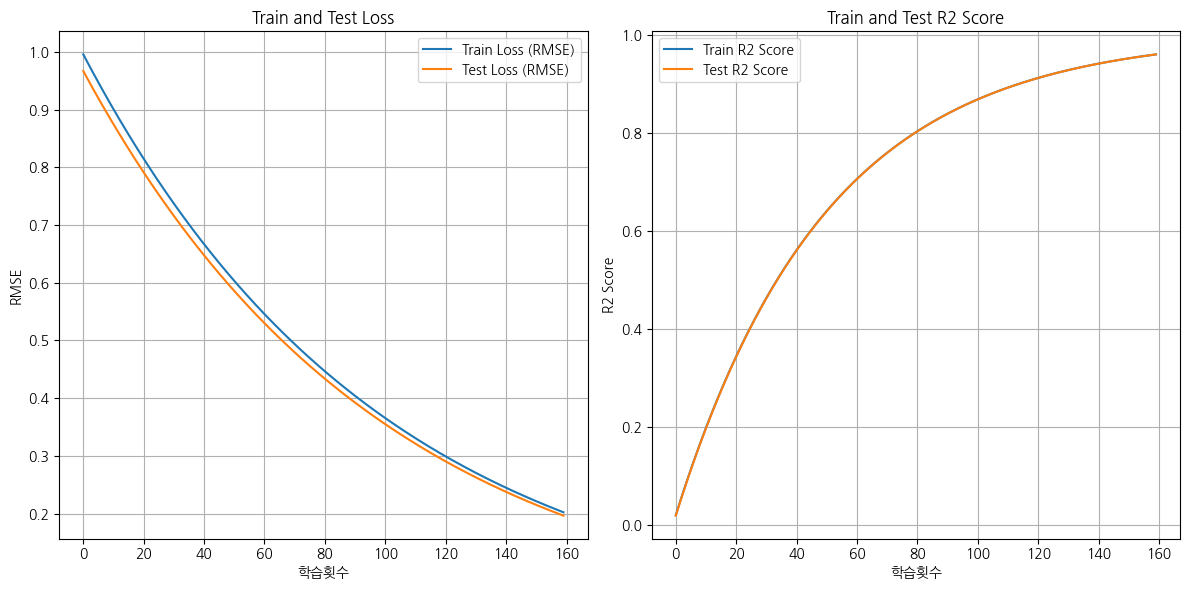


최종 Mean Squared Error: 0.04
최종 R2 Score: 0.96


['./xgboost_seoul_model.pkl']

In [9]:
X = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', 'K-MEAN 군집', '서울특별시_소아과 의료인력 수_표준화', '의료수가_표준화', "서울특별시_건강보험", "서울특별시_천명당 소아과 수"]]
y = NABIS['서울특별시_소아과 병원 수_표준화']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=160, learning_rate=0.01, max_depth=7, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

evals_result = xgb_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

train_r2_scores = []
test_r2_scores = []

for i in range(len(train_loss)):
    y_train_pred = xgb_model.predict(X_train, iteration_range=(0, i + 1))
    y_test_pred = xgb_model.predict(X_test, iteration_range=(0, i + 1))
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss (RMSE)')
plt.plot(test_loss, label='Test Loss (RMSE)')
plt.xlabel('학습횟수')
plt.ylabel('RMSE')
plt.title('Train and Test Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_r2_scores, label='Train R2 Score')
plt.plot(test_r2_scores, label='Test R2 Score')
plt.xlabel('학습횟수')
plt.ylabel('R2 Score')
plt.title('Train and Test R2 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n최종 Mean Squared Error: {mse:.2f}")
print(f"최종 R2 Score: {r2:.2f}")

# 모델 저장 
joblib.dump(xgb_model, './xgboost_seoul_model.pkl')

In [10]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2}')

MSE: 0.03860351539179306, R2: 0.9594781304243339


In [11]:
xgb_model = joblib.load('./xgboost_seoul_model.pkl')

scaler = StandardScaler()
scaler.fit(X_train)  


input_data = {
    '진료과목_인코딩': [3],  
    '지역_인코딩': [8],         # 고정값
    '의료기관_인코딩': [1], 
    '최종수가_표준화': [0.5],  
    'K-MEAN 군집': [9], 
    '서울특별시_소아과 의료인력 수_표준화': [1.577019],
    '의료수가_표준화': [-0.471806],
    "서울특별시_건강보험":[2], 
    "서울특별시_천명당 소아과 수":[1]
}

input_df = pd.DataFrame(input_data)

input_scaled = scaler.transform(input_df)

prediction_1 = xgb_model.predict(input_scaled)
print(f'예측 결과: {prediction_1[0]} (표준화된 소아과 병원 수)')

예측 결과: -0.6436887979507446 (표준화된 소아과 병원 수)


In [14]:
NABIS

,Unnamed: 0,연도,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,강원특별자치도_소아과 의료인력 수,강원특별자치도_천명당 소아과 수,...,전북특별자치도_소아과 의료인력 수_표준화,전라남도_소아과 병원 수_표준화,전라남도_소아과 의료인력 수_표준화,경상북도_소아과 병원 수_표준화,경상북도_소아과 의료인력 수_표준화,경상남도_소아과 병원 수_표준화,경상남도_소아과 의료인력 수_표준화,제주특별자치도_소아과 병원 수_표준화,제주특별자치도_소아과 의료인력 수_표준화,K-MEAN 군집
0,0,2019,258854,74.9,864,19388164.6,1491120,864,527,0.142105,...,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822,9
1,1,2019,258854,83.4,864,21588423.6,1491120,864,527,0.142105,...,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822,9
2,2,2019,258854,74.9,10940,19388164.6,1491120,864,527,0.142105,...,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822,2
3,3,2019,258854,83.4,10940,21588423.6,1491120,864,527,0.142105,...,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822,2
4,4,2019,258854,74.9,8032,19388164.6,1491120,864,527,0.142105,...,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1787,2022,617545,78.4,8032,48415528.0,1503671,904,618,0.148003,...,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767,1
1788,1788,2022,617545,78.4,996,48415528.0,1503671,904,618,0.148003,...,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767,5
1789,1789,2022,617545,90.2,996,55702559.0,1503671,904,618,0.148003,...,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767,5
1790,1790,2022,617545,78.4,816,48415528.0,1503671,904,618,0.148003,...,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767,0


In [16]:
NABIS["연도"].value_counts()

연도
2019    448
2020    448
2021    448
2022    448
Name: count, dtype: int64

In [12]:
NABIS["서울특별시_소아과 의료인력 수_표준화"]

0      -0.922871
1      -0.922871
2      -0.922871
3      -0.922871
4      -0.922871
          ...   
1787    1.577019
1788    1.577019
1789    1.577019
1790    1.577019
1791    1.577019
Name: 서울특별시_소아과 의료인력 수_표준화, Length: 1792, dtype: float64

In [13]:
NABIS["의료수가_표준화"]

0      -0.670936
1      -0.670936
2      -0.670936
3      -0.670936
4      -0.670936
          ...   
1787   -0.471806
1788   -0.471806
1789   -0.471806
1790   -0.471806
1791   -0.471806
Name: 의료수가_표준화, Length: 1792, dtype: float64